In [1]:
# Model two moving circles. Use SymPy to find exactly when they will collide. Understand why SymPy returns multiple answers.

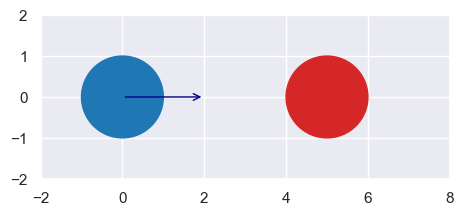

In [12]:
from perfect_physics import Circle, plot

a = Circle(x=0, y=0, r=1, vx=2, vy=0)
b = Circle(x=5, y=0, r=1, vx=0, vy=0)
plot(
    [a, b],
    colors=["tab:blue", "tab:red"],
    xlim=[-2, 8],
    ylim=[-2, 2],
    font_scale=1,
)
pass


In [5]:
from sympy import symbols, Eq

# define symbols
t = symbols("t")
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols("a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y")
b_x, b_y, b_vx, b_vy, b_r, bprime_x, bprime_y = symbols("b_x, b_y, b_vx, b_vy, b_r, b'_x, b'_y")

# define equations
eq1 = Eq(aprime_x, a_x + a_vx * t)
eq2 = Eq(aprime_y, a_y + a_vy * t)
eq3 = Eq(bprime_x, b_x + b_vx * t)
eq4 = Eq(bprime_y, b_y + b_vy * t)

eq1

Eq(a'_x, a_vx*t + a_x)

In [6]:
eq5 = Eq((aprime_x - bprime_x) ** 2 + (aprime_y - bprime_y) ** 2,
         (a_r + b_r)**2)
eq5

Eq((a'_x - b'_x)**2 + (a'_y - b'_y)**2, (a_r + b_r)**2)

In [8]:
from sympy import nonlinsolve
from perfect_physics import save

cc_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, bprime_x, bprime_y)
cc_time_solutions = [t for t, aprime_x, ap_y, bp_x, bp_y in cc_all_solutions]
save(cc_time_solutions, "cc_time_solutions.sympy")
cc_time_solutions[0]

(-a_vx*a_x + a_vx*b_x - a_vy*a_y + a_vy*b_y + a_x*b_vx + a_y*b_vy - b_vx*b_x - b_vy*b_y + sqrt(a_r**2*a_vx**2 - 2*a_r**2*a_vx*b_vx + a_r**2*a_vy**2 - 2*a_r**2*a_vy*b_vy + a_r**2*b_vx**2 + a_r**2*b_vy**2 + 2*a_r*a_vx**2*b_r - 4*a_r*a_vx*b_r*b_vx + 2*a_r*a_vy**2*b_r - 4*a_r*a_vy*b_r*b_vy + 2*a_r*b_r*b_vx**2 + 2*a_r*b_r*b_vy**2 - a_vx**2*a_y**2 + 2*a_vx**2*a_y*b_y + a_vx**2*b_r**2 - a_vx**2*b_y**2 + 2*a_vx*a_vy*a_x*a_y - 2*a_vx*a_vy*a_x*b_y - 2*a_vx*a_vy*a_y*b_x + 2*a_vx*a_vy*b_x*b_y - 2*a_vx*a_x*a_y*b_vy + 2*a_vx*a_x*b_vy*b_y + 2*a_vx*a_y**2*b_vx - 4*a_vx*a_y*b_vx*b_y + 2*a_vx*a_y*b_vy*b_x - 2*a_vx*b_r**2*b_vx + 2*a_vx*b_vx*b_y**2 - 2*a_vx*b_vy*b_x*b_y - a_vy**2*a_x**2 + 2*a_vy**2*a_x*b_x + a_vy**2*b_r**2 - a_vy**2*b_x**2 + 2*a_vy*a_x**2*b_vy - 2*a_vy*a_x*a_y*b_vx + 2*a_vy*a_x*b_vx*b_y - 4*a_vy*a_x*b_vy*b_x + 2*a_vy*a_y*b_vx*b_x - 2*a_vy*b_r**2*b_vy - 2*a_vy*b_vx*b_x*b_y + 2*a_vy*b_vy*b_x**2 - a_x**2*b_vy**2 + 2*a_x*a_y*b_vx*b_vy - 2*a_x*b_vx*b_vy*b_y + 2*a_x*b_vy**2*b_x - a_y**2*b_vx**2

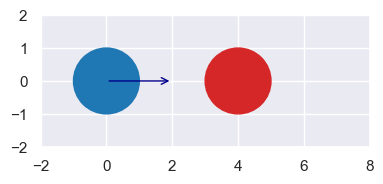

In [13]:
from perfect_physics import Circle, plot
a = Circle(x=0,y=0,r=1,vx=2,vy=0)
b = Circle(x=4,y=0,r=1,vx=0,vy=0)
plot([a, b], colors=["tab:blue","tab:red"], xlim=(-2,8), ylim=(-2,2), figsize=(4,2), font_scale=1)

pass # avoid showing the plot twice

[3, 1]


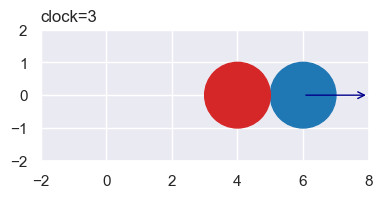

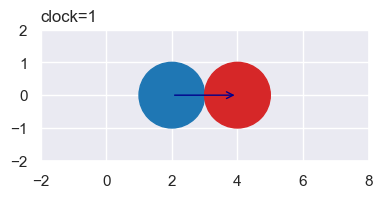

In [16]:
from perfect_physics import load
cc_time_solutions = load("cc_time_solutions.sympy")
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy)])
         for time_solution in cc_time_solutions]
print(times)
for time in times:
    plot([a.tick_clone(time), b.tick_clone(time)], clock=time,
    colors=["tab:blue","tab:red"], xlim=(-2,8), ylim=(-2,2), figsize=(4,2), font_scale=1)

[-2 + sqrt(2), -2 - sqrt(2)]


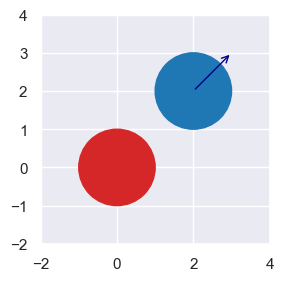

In [18]:
a = Circle(x=2,y=2,r=1,vx=1,vy=1)
b = Circle(x=0,y=0,r=1,vx=0,vy=0)
plot([a, b], colors=["tab:blue","tab:red"], xlim=(-2,4), ylim=(-2,4), figsize=(3,3), font_scale=1)
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy)])
         for time_solution in cc_time_solutions]
print(times)

In [26]:
[float(time) for time in times]

[-0.585786437626905, -3.414213562373095]

[nan, nan]


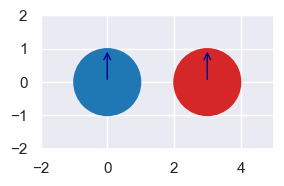

In [19]:
a = Circle(x=0,y=0,r=1,vx=0,vy=1)
b = Circle(x=3,y=0,r=1,vx=0,vy=1)
plot([a, b], colors=["tab:blue","tab:red"], xlim=(-2,5), ylim=(-2,2), figsize=(3,3), font_scale=1)
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy)])
         for time_solution in cc_time_solutions]
print(times)

[2 + sqrt(2)*I, 2 - sqrt(2)*I]


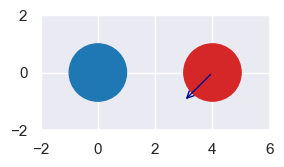

In [21]:
a = Circle(x=0,y=0,r=1,vx=0,vy=0)
b = Circle(x=4,y=0,r=1,vx=-1,vy=-1)
plot([a, b], colors=["tab:blue","tab:red"], xlim=(-2,6), ylim=(-2,2), figsize=(3,3), font_scale=1)
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("b_x", b.x), ("b_y", b.y), ("b_r", b.r), ("b_vx", b.vx), ("b_vy", b.vy)])
         for time_solution in cc_time_solutions]
print(times)